In [24]:
import pandas as pd
import numpy as np
import seaborn as sns

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [25]:
df = pd.read_csv('FoodPrice_in_Turkey.csv')

In [26]:
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [27]:
df.tail()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
7376,Izmir,502,Cocoa (powder) - Retail,5,KG,8,2019,47.9040
7377,Izmir,502,Cocoa (powder) - Retail,5,KG,9,2019,49.1176
7378,Izmir,502,Cocoa (powder) - Retail,5,KG,10,2019,50.8347
7379,Izmir,502,Cocoa (powder) - Retail,5,KG,11,2019,51.7985
7380,Izmir,502,Cocoa (powder) - Retail,5,KG,12,2019,51.6071


In [28]:
df.sample()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
655,National Average,114,Tomatoes - Retail,5,KG,1,2015,2.192


In [9]:
df.shape

(7381, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


In [11]:
df.describe()

,ProductId,UmId,Month,Year,Price
count,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000
mean,254.509687,15.252811,6.479881,2017.458474,15.738709
std,141.008599,25.276665,3.530361,1.499256,22.418284
min,52.000000,5.000000,1.000000,2013.000000,0.253900
25%,114.000000,5.000000,3.000000,2017.000000,3.223600
50%,239.000000,5.000000,6.000000,2018.000000,5.909600
75%,388.000000,5.000000,10.000000,2019.000000,20.441900
max,502.000000,102.000000,12.000000,2019.000000,159.445800


In [12]:
df.isna()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
7376,False,False,False,False,False,False,False,False
7377,False,False,False,False,False,False,False,False
7378,False,False,False,False,False,False,False,False
7379,False,False,False,False,False,False,False,False


<Axes: ylabel='Price'>

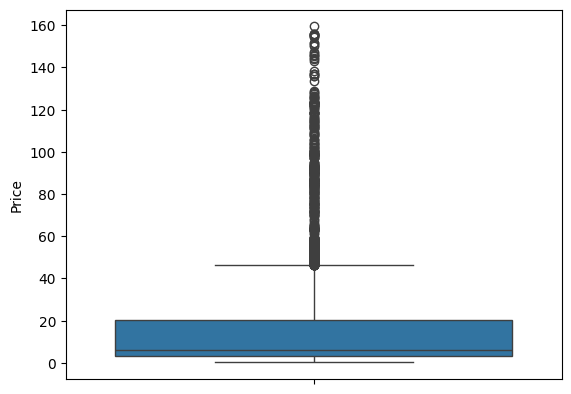

In [13]:
sns.boxplot(df['Price'])

In [14]:
df['Price'].describe()

count    7381.000000
mean       15.738709
std        22.418284
min         0.253900
25%         3.223600
50%         5.909600
75%        20.441900
max       159.445800
Name: Price, dtype: float64

In [16]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3-Q1

In [17]:
upper = Q3 = 1.5* IQR
lower = Q1- 1.5*IQR

In [20]:
outlier = df[(df['Price']<lower) | (df['Price']> upper)]

In [21]:
outlier

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
504,National Average,105,Garlic - Retail,5,KG,9,2019,32.6909
505,National Average,105,Garlic - Retail,5,KG,10,2019,38.4600
506,National Average,105,Garlic - Retail,5,KG,11,2019,37.8379
507,National Average,105,Garlic - Retail,5,KG,12,2019,37.2093
764,National Average,119,Groundnuts (shelled) - Retail,5,KG,5,2019,30.7141
...,...,...,...,...,...,...,...,...
7376,Izmir,502,Cocoa (powder) - Retail,5,KG,8,2019,47.9040
7377,Izmir,502,Cocoa (powder) - Retail,5,KG,9,2019,49.1176
7378,Izmir,502,Cocoa (powder) - Retail,5,KG,10,2019,50.8347
7379,Izmir,502,Cocoa (powder) - Retail,5,KG,11,2019,51.7985


In [23]:
df = df[~((df['Price'] < lower) | (df['Price'] > upper))]